# Steven Granaturov Assignment Week 8 #

#### Import Data & Load Dataframe ####

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


data = pd.read_csv("SeoulBikeData.csv")

data.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


#### Encode non-Integer values ####

In [80]:
data_copy = data.copy()

vals1, data_copy['Seasons'] = np.unique(data_copy['Seasons'].values, return_inverse=True)
vals2, data_copy['Holiday'] = np.unique(data_copy['Holiday'].values, return_inverse=True)
vals3, data_copy['Functioning Day'] = np.unique(data_copy['Functioning Day'].values, return_inverse=True)

data_copy.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1


#### Extract the Month, Day, Year from the Date & Remove Date Column ####

In [81]:
data_copy['Month'] = 0
data_copy['Day'] = 0
data_copy['Year'] = 0


for row, index in data_copy.iterrows():
    data_copy.at[row, "Month"] = data_copy.at[row, "Date"][:2]
    data_copy.at[row, "Day"] = data_copy.at[row, "Date"][3:5]
    data_copy.at[row, "Year"] = data_copy.at[row, "Date"][6:]

data_copy['Month'] = data_copy["Month"].astype(int)
data_copy['Day'] = data_copy["Day"].astype(int)
data_copy['Year'] = data_copy["Year"].astype(int)

data_format = data_copy.iloc[:, 1:]
data_format.head(25)


C:\Users\steve\AppData\Local\Temp\ipykernel_10116\1587876120.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '01' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_copy.at[row, "Month"] = data_copy.at[row, "Date"][:2]
C:\Users\steve\AppData\Local\Temp\ipykernel_10116\1587876120.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '12' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_copy.at[row, "Day"] = data_copy.at[row, "Date"][3:5]
C:\Users\steve\AppData\Local\Temp\ipykernel_10116\1587876120.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2017' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_copy.at[row, "Year"] = data_copy.at[row, "

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Month,Day,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,3,1,1,1,12,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,3,1,1,1,12,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,3,1,1,1,12,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,3,1,1,1,12,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,3,1,1,1,12,2017
5,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,3,1,1,1,12,2017
6,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,3,1,1,1,12,2017
7,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,3,1,1,1,12,2017
8,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,3,1,1,1,12,2017
9,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,3,1,1,1,12,2017


#### Round the temperature down (for simplicity) ####

In [82]:
for row, index in data_format.iterrows():
    data_format.at[row, 'Temperature'] = math.floor(data_format.at[row, 'Temperature'])


#### Plot Month vs. # of Bikes Rented ####

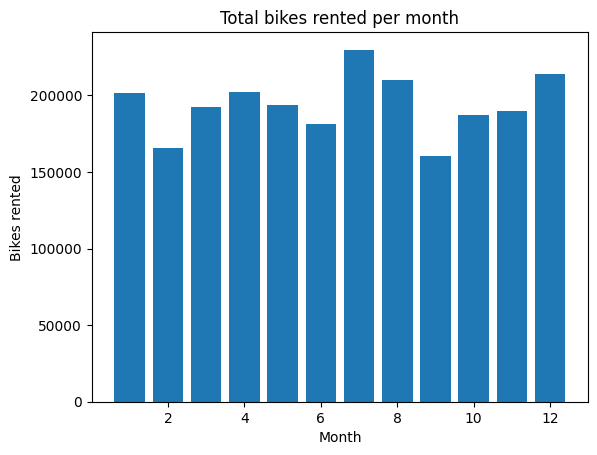

In [83]:
monthly_sum = []
for i in range(1,13):
    data_month = data_format[data_format["Month"] == i]
    sum = data_month["Rented Bike Count"].sum()
    monthly_sum.append(sum)

plt.bar(np.arange(1, 13), monthly_sum, label = "Bikes Rented")
plt.xlabel("Month")
plt.ylabel("Bikes rented")
plt.title("Total bikes rented per month")

plt.show()

#### Month vs. Avg # of Bikes Rented ####

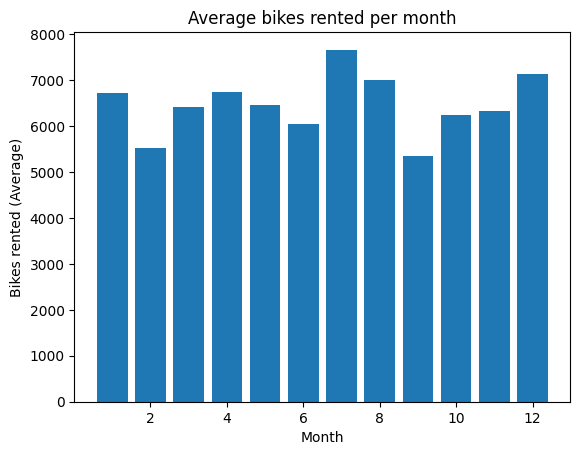

In [84]:
monthly_sum_avg = []
for i in range(1,13):
    data_month = data_format[data_format["Month"] == i]
    avg = data_month["Rented Bike Count"].sum() / 30
    monthly_sum_avg.append(avg)

plt.bar(np.arange(1, 13), monthly_sum_avg)
plt.xlabel("Month")
plt.ylabel("Bikes rented (Average)")
plt.title("Average bikes rented per month")

plt.show()

#### Plot Hour vs. # of Bikes Rented ####

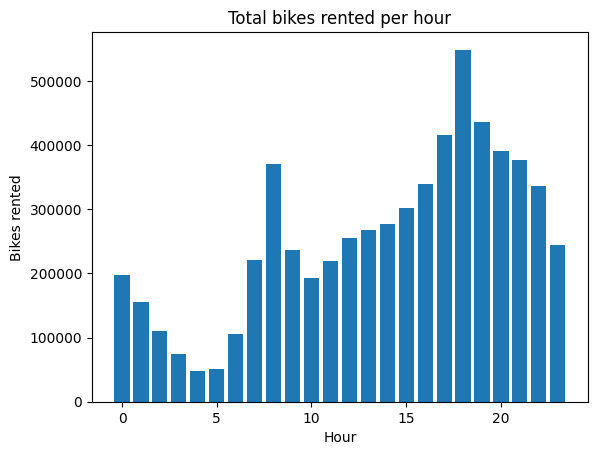

In [85]:
hourly_sum = []
for i in range(0, 24):
    data_hourly = data_format[data_format["Hour"] == i]
    sum = data_hourly['Rented Bike Count'].sum()
    hourly_sum.append(sum)

plt.bar(np.arange(0, 24), hourly_sum)
plt.xlabel("Hour")
plt.ylabel("Bikes rented")
plt.title("Total bikes rented per hour")

plt.show()

#### Plot Temperature vs. # of Bikes Rented ####

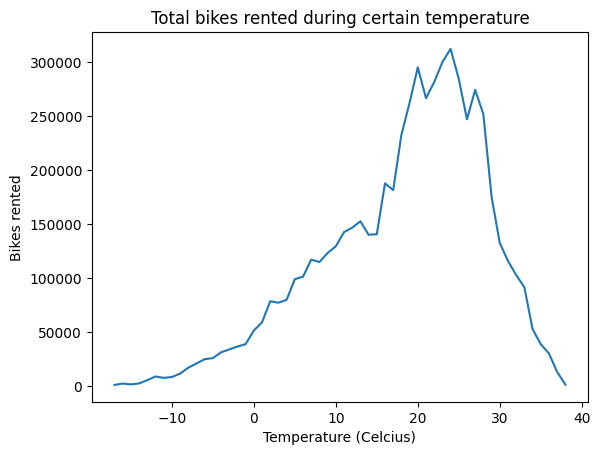

In [86]:
# Temp ranges from -18 to 39
temps = np.arange(-17, 39)

temp_sum = []
for i in range(len(temps)):
    data_temp = data_format[data_format['Temperature'] == temps[i]]
    sum = data_temp['Rented Bike Count'].sum()
    temp_sum.append(sum)

plt.plot(np.arange(-17, 39), temp_sum)
plt.xlabel("Temperature (Celcius)")
plt.ylabel("Bikes rented")
plt.title("Total bikes rented during certain temperature")

plt.show()

#### Data Preparation ####

In [87]:
# Creating a temporary dataframe for the bikes rented
df_target = pd.DataFrame(data_format['Rented Bike Count'])

# Dropping the quality column in the original dataframe
df = data_format.iloc[:, 1:]
df.head()


,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Month,Day,Year
0,0,-6.0,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1,1,12,2017
1,1,-6.0,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1,1,12,2017
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1,1,12,2017
3,3,-7.0,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1,1,12,2017
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1,1,12,2017


#### Scale the Data ####

In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

df_s = scaler.fit_transform(df)
df_data = pd.DataFrame(df_s)

scaled_df = pd.concat([df_target, df_data], axis=1)
scaled_df.head()


,Rented Bike Count,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,254,-1.661325,-1.542123,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,1.349771,0.227757,0.18668,-1.673503,1.587648,-3.282407
1,204,-1.516862,-1.542123,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,1.349771,0.227757,0.18668,-1.673503,1.587648,-3.282407
2,173,-1.372399,-1.542123,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891,1.349771,0.227757,0.18668,-1.673503,1.587648,-3.282407
3,107,-1.227936,-1.625800,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,1.349771,0.227757,0.18668,-1.673503,1.587648,-3.282407
4,78,-1.083473,-1.542123,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891,1.349771,0.227757,0.18668,-1.673503,1.587648,-3.282407


#### Train, Test, Split Data ####

In [89]:
X = scaled_df.iloc[:, 1:]
y = scaled_df['Rented Bike Count']

from sklearn.model_selection import train_test_split

# Split the data into training (70%) and temporary (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the temporary data into validation (50%) and test (50%)
validation_data, test_data = train_test_split(y_test, test_size = 0.5, random_state = 42)

#### Plot Heatmap ####

<Axes: >

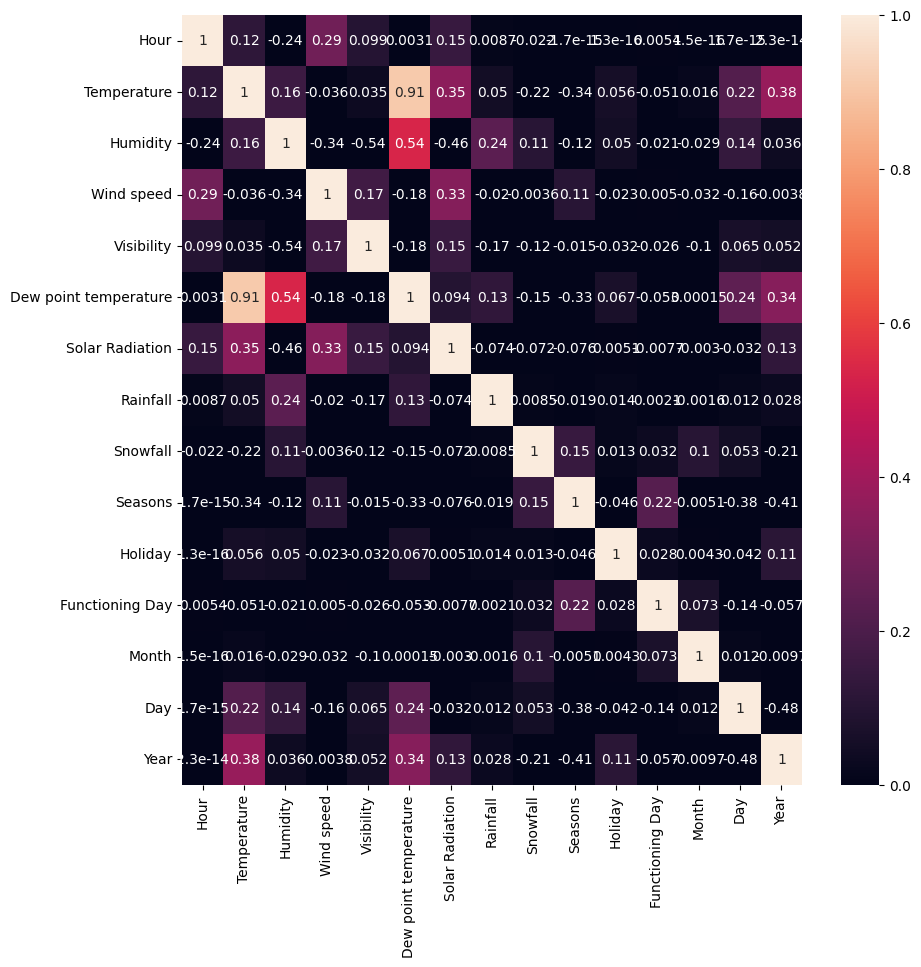

In [90]:
from seaborn import heatmap
plt.figure(figsize=(10,10))
heatmap(df.corr(), vmin=0, vmax=1, annot=True, color='Red')

#### Create Linear Regression Model ####

In [91]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

lin_reg.coef_, lin_reg.intercept_

(array([ 195.34968959,  200.41268322, -228.17178913,   18.44710742,
           9.36741292,  178.17377108,  -69.90275025,  -75.3656998 ,
          11.4303355 , -117.64107847,   29.75548525,  174.20451624,
          -9.34493477,    5.08045995,  -17.83031608]),
 702.6679988402573)

#### Obtain Linear Regression Score ####

In [92]:
y_hat = lin_reg.predict(X_test)

score=lin_reg.score(X_test, y_test)
score

0.5347543176317215

#### Use Linear Regression to Predict values ####

In [93]:
df2 = pd.DataFrame({'Actual Quality': y_test, 'Predicted Quality': y_hat[:len(y_test)]})
df2.head()

,Actual Quality,Predicted Quality
6056,1728,954.762120
5556,822,1127.372991
5990,658,1379.121152
7674,2716,1330.061553
3319,1083,557.367559


#### Plot predicted vs. Actual values ####

Text(0.5, 1.0, 'Ground Truth vs Predicted')

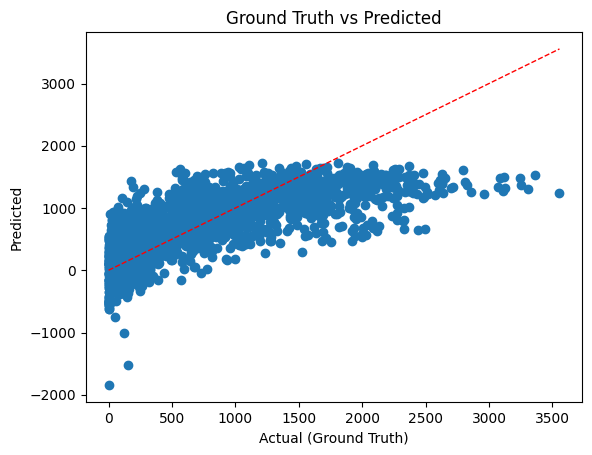

In [94]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_hat)
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], lw=1, color='red', linestyle='--', label='Perfect Prediction')
ax.set_xlabel('Actual (Ground Truth)')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")

#### Obtain mean squared error, mean absolute error, r2 score ####

In [95]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2 = r2_score(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
mae = mean_absolute_error(y_test, y_hat)
r2, mse, mae

(0.5347543176317215, 190653.07763084606, 326.9227353522447)

#### Create Random Forest Model ####

In [96]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000)

rf.fit(X_train, y_train)
y_hat = rf.predict(X_test)

errors = abs(y_hat - y_test)
acc = 1 - errors

rf.score(X_test, y_test), np.mean(acc)

(0.8744886531401521, -134.69601407914763)

#### Plot Predicted vs. Actual values ####

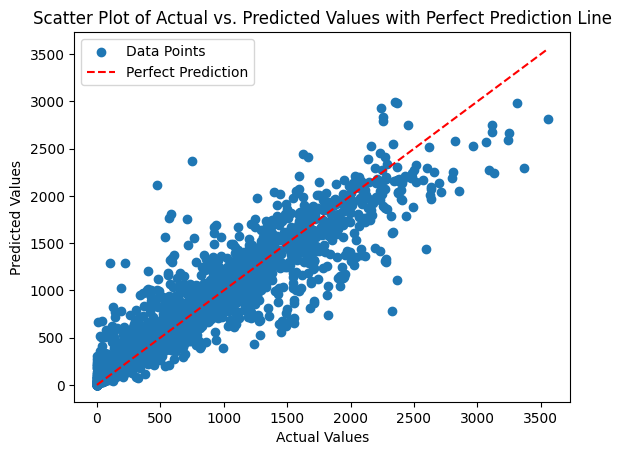

In [97]:
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_hat, label='Data Points')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Add a line representing a perfect prediction (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

plt.legend()
plt.title("Scatter Plot of Actual vs. Predicted Values with Perfect Prediction Line")
plt.show()


#### Plot Feature Importance ####

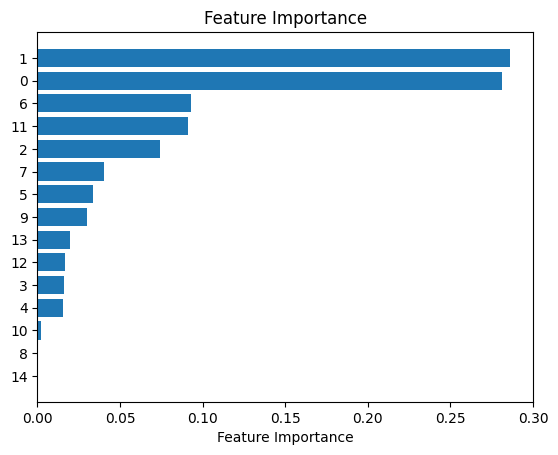

In [98]:
feature_names = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), feature_names[indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()
